<a href="https://colab.research.google.com/github/manuelrey94/EXAMEN-FINAL-PYTHON-2/blob/main/ExamenFinal_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXAMEN FINAL: ANALISIS DE DATOS CON PYTHON**
#**NOMBRE: MANUEL REYNALDO SIANCAS HUERTA**




# Pregunta 1: Establezca 2 modelos de clasificación para el data Iris

In [352]:
#se importan las librerías a utilizar, lo correcto es importarlas todas desde el inicio, pero no siempre se sabe todo lo que se va a utilizar hasta que se elabora el codigo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)


In [353]:
#creo el data set, en este caso lo he leido desde git hub, pero también puede leerse desde sklearn con sklearn.datasets.load_iris
df1=pd.read_csv('https://raw.githubusercontent.com/manuelrey94/EXAMEN-FINAL-PYTHON-2/main/Iris.csv')
df1


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [354]:
#obtengo las estadísticas de la data set
df1.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


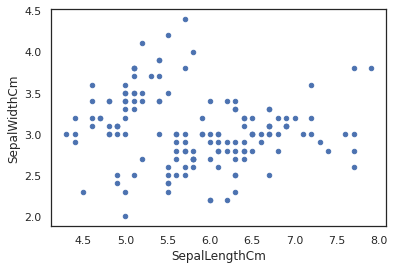

In [355]:
#realizo diagrama de dispersión con matplotlib
df1.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm") 

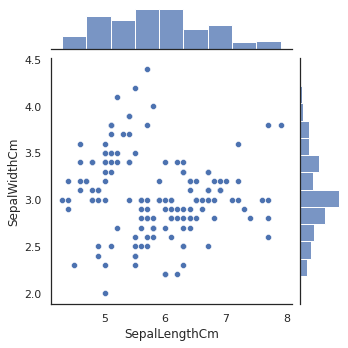

In [356]:
#Realizo diagrama de dispersión e histograma en un mismo gráfico con seaborn
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df1, size=5) 

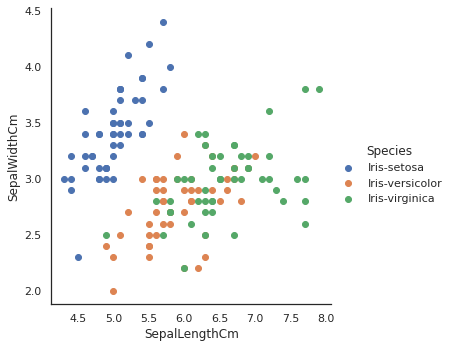

In [357]:
#creo un diagrama de dispersión pero donde se diferncias las especies por colores
sns.FacetGrid(df1, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

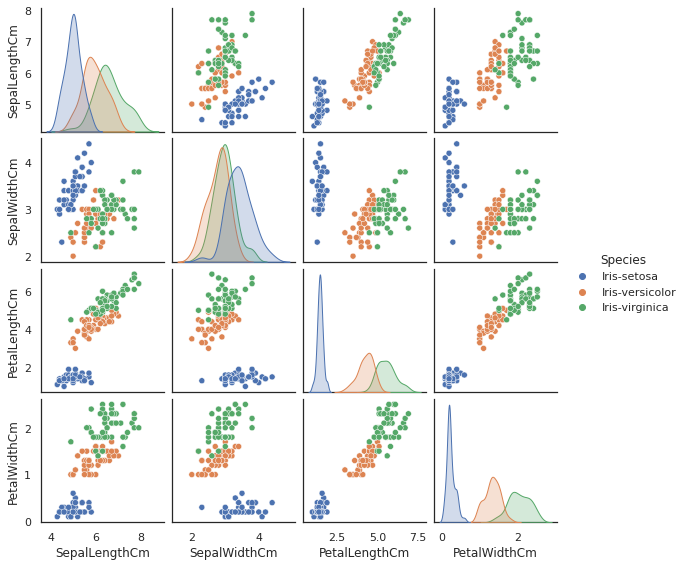

In [358]:
#creo una diagrama de pares a partir de seaborn para distinguir como se separa Iris setosa de las otras especies
sns.pairplot(df1.drop("Id", axis=1), hue="Species", size=2)

In [359]:
# importo las métricas para poder evaluar los modelos a implementar e importo la herramienta para poder crear set de entrenamiento y validación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [360]:
# Se separa la data set en features y target, además de ellos defino el set de entrenamiento y de validación con tts
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [361]:
# el primer modelo a crear es regresión logística

from sklearn.linear_model import LogisticRegression  #importo el modelo de clasificación: "regresión logística"
classifier = LogisticRegression() #creo el modelo
classifier.fit(X_train, y_train) #defino el ajuste del modelo con los datos de entrenamiento

y_pred = classifier.predict(X_test) #realizo la prueba del modelo

print(classification_report(y_test, y_pred)) # muestro el reporte de la clasificación realizada
print(confusion_matrix(y_test, y_pred)) # muestro la matriz de confusión

from sklearn.metrics import accuracy_score  #importa el parámetro para evaluar la precisión del modelo
print('la precisión del modelo es: ',accuracy_score(y_pred,y_test)) # muestro la precisión del modelo

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
la precisión del modelo es:  1.0


In [362]:
# El segundo modelo a implementar es KNN

from sklearn.neighbors import KNeighborsClassifier #importo el modelo de clasificación: "KNN"

classifier = KNeighborsClassifier(n_neighbors=10) #defino el modelo KNN con parámetro = 4
classifier.fit(X_train, y_train) # Ajusto el modelo con la data de entrenamiento


y_pred = classifier.predict(X_test)  #realizo la predicción con el set de validación

print(classification_report(y_test, y_pred))  # muestro el reporte de de la clasificación realizada
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('la precision es ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
la precision es  1.0


# Pregunta 2: Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses



In [363]:
#importo las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [364]:
#Creo el dataset y muesto la data
df2=pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv')
df2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [365]:
#Obtengo las estadísticas de la data set, esto sirve para hacerse una idea de la dimensión de los valores de las datos en cada columna
df2.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [366]:
# muestro la información de la data set para identificar si todas las columnas están completas o tienen datos faltantes, es importante para que haya consistencia de dimensiones luego
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


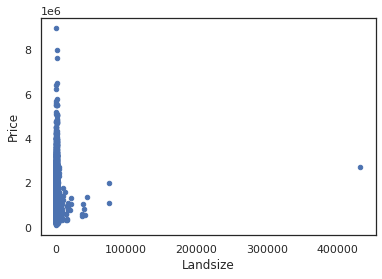

In [367]:
#Elabooro una gráfica de dispersión para poder identificar la distribución de los datos, y outliers
df2.plot(kind="scatter", x="Landsize", y="Price") 

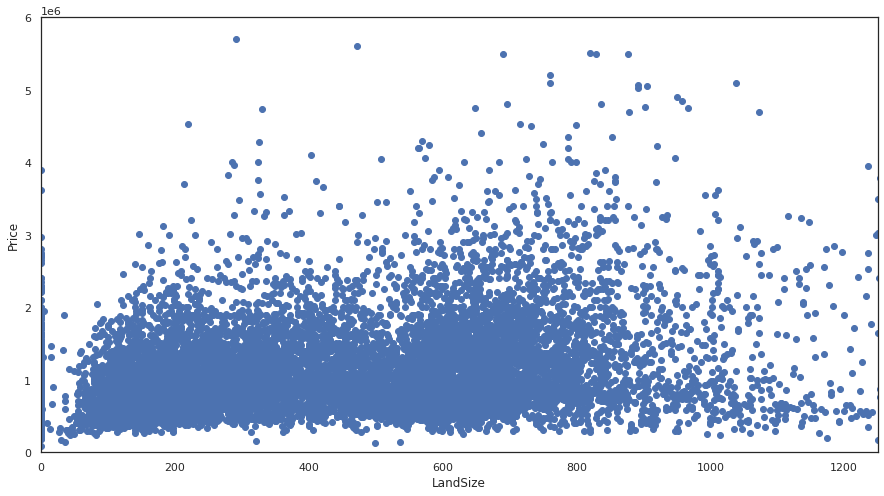

In [368]:
# Realizo un nuevo gráfico de dispersión tomando rangos adecuados para las variables del gráfico
fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(df2['Landsize'], df2['Price'])
ax.set_xlabel('LandSize')
ax.set_ylabel('Price')
plt.xlim([0,1250])
plt.ylim([0,6e6])
plt.show()

In [369]:
#A CONTINUACIÓN SE REALIZA EL ANÁLISIS DE PCA
#Quito las columnas que no tienen valores numéricos

X = np.array(df2.drop(columns = ['Suburb','Address','Type','Method','SellerG','Date','BuildingArea','YearBuilt','Car','CouncilArea','Regionname']))
X[1,:]




array([ 2.000000e+00,  1.035000e+06,  2.500000e+00,  3.067000e+03,
        2.000000e+00,  1.000000e+00,  1.560000e+02, -3.780790e+01,
        1.449934e+02,  4.019000e+03])

In [370]:
X_df2=df2.drop(columns = ['Suburb',	'Address',	'Type', 'Method', 'SellerG', 'Date', 'BuildingArea', 'YearBuilt', 'Car', 'CouncilArea', 'Regionname']) #matriz de dispersión

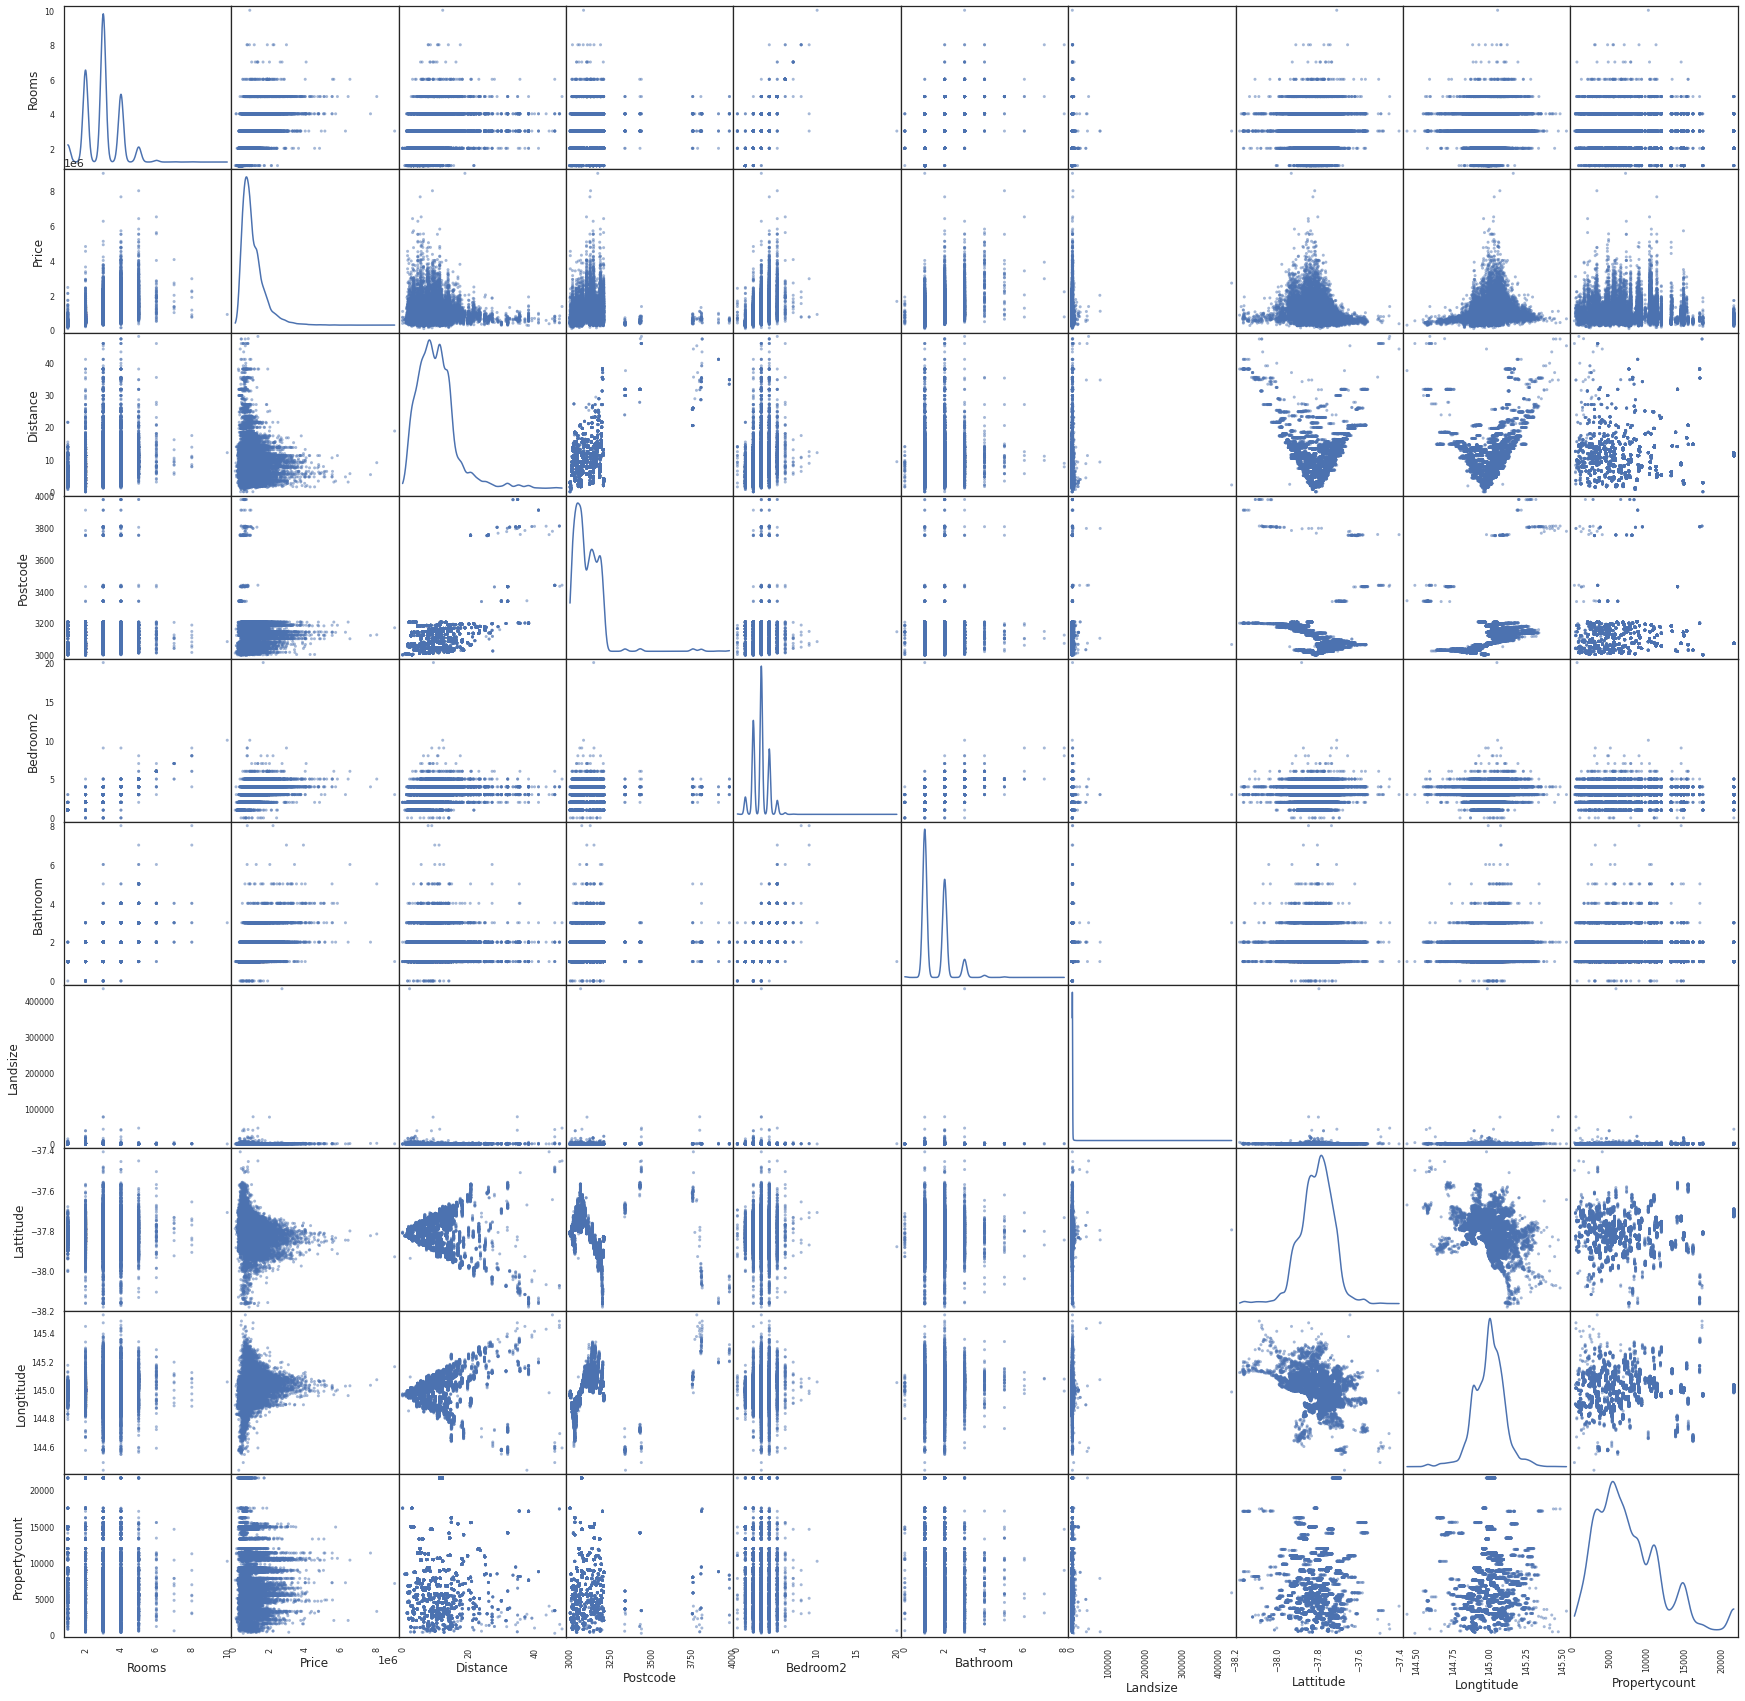

In [371]:
#Construyo la gráfica de la matriz de dispersión

import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(X_df2,figsize = (30,30), diagonal = 'kde')
plt.show()

In [372]:
#Se realiza el escalamiento

from sklearn.preprocessing import MinMaxScaler

escalador= MinMaxScaler()

X_escalado = escalador.fit_transform(X)

In [373]:
#Visualizo el escalado de la primera fila

print(X_escalado[0,:])

[1.11111111e-01 1.56477846e-01 5.19750520e-02 6.85772774e-02
 1.00000000e-01 1.25000000e-01 4.66497619e-04 4.94754658e-01
 5.17651251e-01 1.76159993e-01]


In [374]:
#Realización de PCA :

from sklearn.decomposition import PCA
pca1 = PCA(n_components=2) #Reduzco a dos dimensiones

#A continuación genero el valor de la matriz de autovectores

pca1.fit(X_escalado)
Xpca=pca1.transform(X_escalado)

In [375]:
#imprimo la forma 
print(np.shape(pca1.components_))


(2, 10)


In [376]:
# Ahora se debe diferenciar entre X_escalado y X_pca

print(X_escalado[0,:])
print("-"*100)
print(Xpca[0,:])

[1.11111111e-01 1.56477846e-01 5.19750520e-02 6.85772774e-02
 1.00000000e-01 1.25000000e-01 4.66497619e-04 4.94754658e-01
 5.17651251e-01 1.76159993e-01]
----------------------------------------------------------------------------------------------------
[-0.13873101 -0.18641548]


In [378]:
#Se realiza un gráfico de dispersión entre clases

print(np.shape(Xpca))

#Se define y
# el target no es del todo claro en la dataset de melbourne houses, pero tomaré Method porque tiene varias clases

y=np.array(df2['Method'])
print(np.shape(y))


(13580, 2)
(13580,)


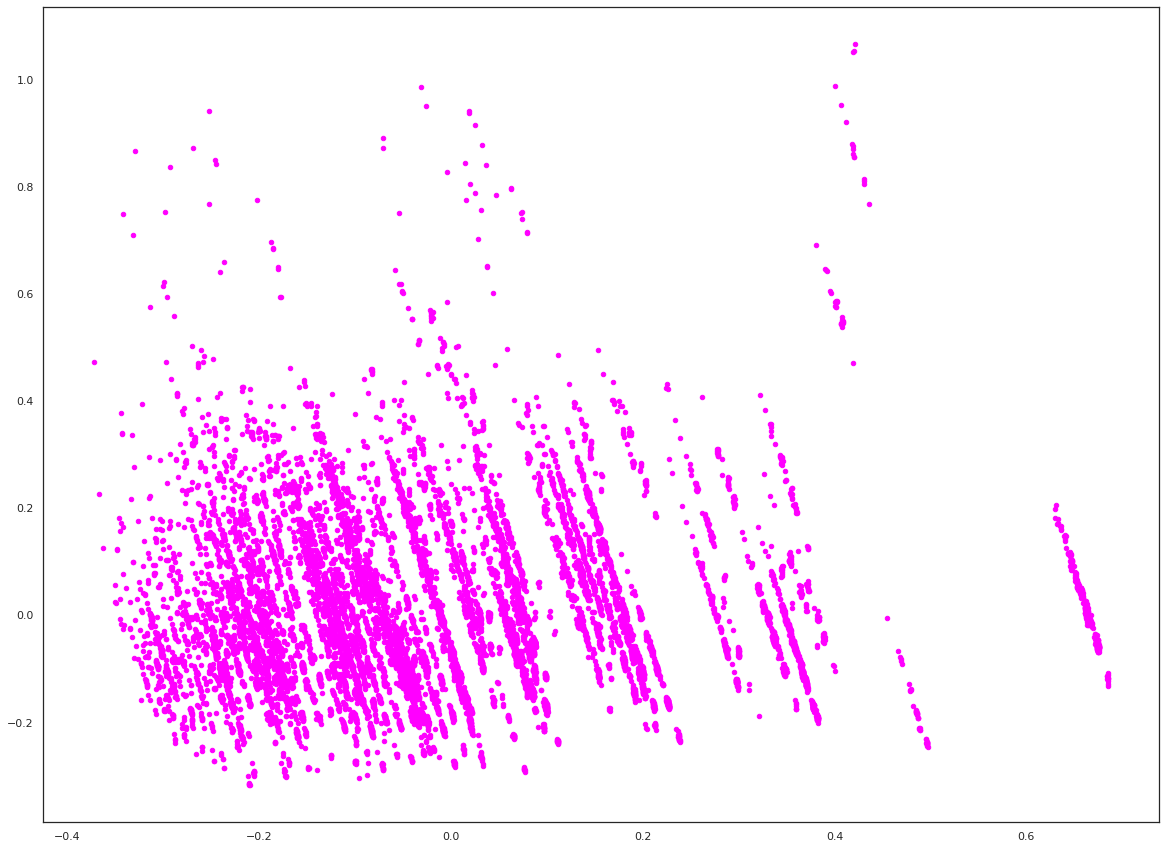

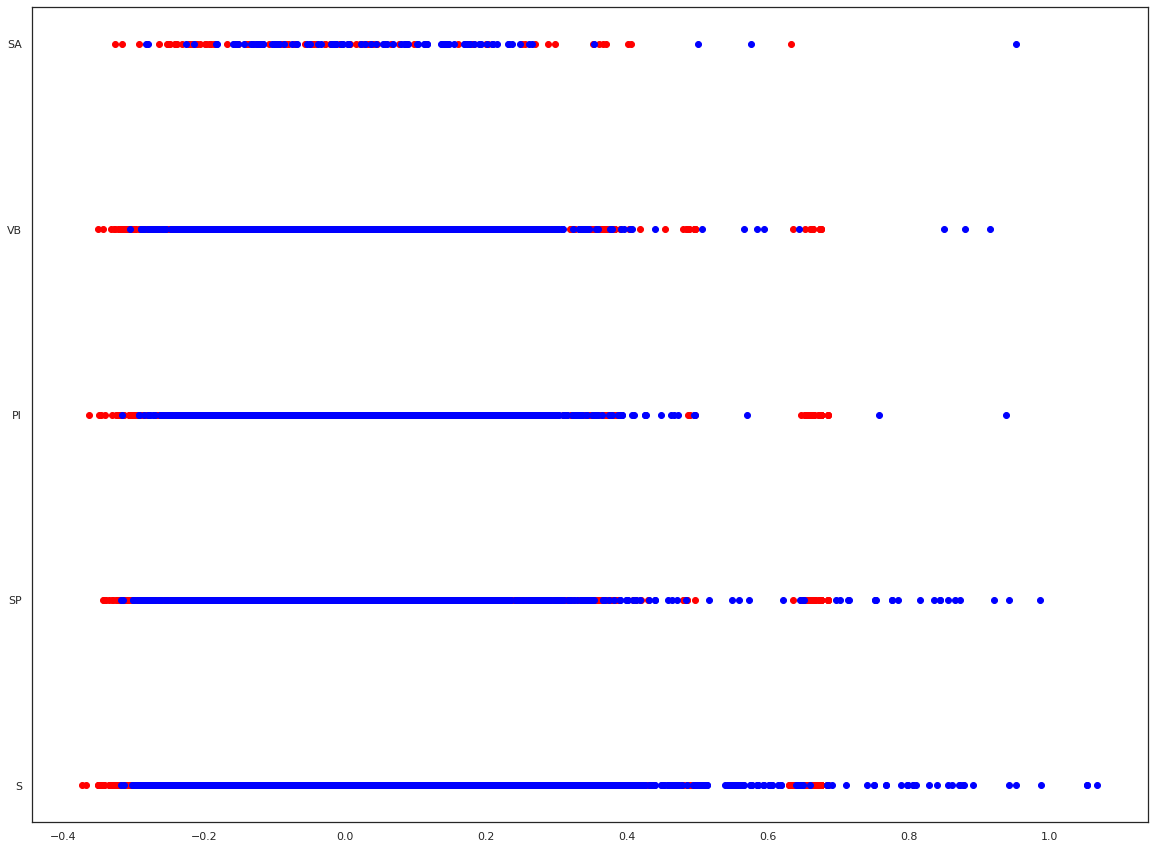

In [380]:
#Finalmente se hace el gráfico de dispersión

plt.figure(figsize = (20,15))
plt.scatter(Xpca[:,0],Xpca[:,1],c= 'magenta',s = 20)
plt.show()

plt.figure(figsize = (20,15))
plt.scatter(Xpca[:,0],y,c='red')
plt.scatter(Xpca[:,1],y,c='blue')
plt.show()

#no logré separarlos en dos colores, cuando coloco c= y , me arroja error. Una solución podría ser separar en dos variables diferentes vs una misma variable y plotear en un mismo grafico, tambien se podria usar un colormap con categoría.

In [381]:
# LUEGO DE ELLO SE VA A UTILIZAR EL MÉTODOS K-MEANS PARA LA MISMA DATASET YA ESTUDIADA DE MELBOURNE HOUSES

#Primero se va obtiene la matriz de características:

X_featuresdf = X_df2
X_featuresarray=np.array(X_featuresdf)

X_feat_method = df2['Method']
X_feat_method_array = np.array(X_feat_method)


In [382]:
#Realizo la codificación de la columna Methods que no contiene cantidades numéricas

from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

Encoder.fit(X_feat_method_array)

x_method_encoder = Encoder.fit_transform(X_feat_method_array)


In [383]:
#Imrpimo los valores ya codificados (0, 1 , 2 y 3 para las cuatro categorías que tiene methods: S, SP, PI, VB)
print(x_method_encoder)

[1 1 3 ... 1 0 3]


In [384]:
#Posteriormente se preocede a eliminar x_method , y también las otras columnas que no he codificado y que no voy a tomar  en cuenta para el análisis,
#quito las mismas que quité en PCA , porque estoy comparando.

X_sinmethod = df2.drop(columns = ['Suburb',	'Address',	'Type', 'Method', 'SellerG', 'Date', 'BuildingArea', 'YearBuilt', 'Car', 'CouncilArea', 'Regionname'])
X_sinmethod['Método codificado'] = x_method_encoder
X_sinmethod

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount,Método codificado
0,2,1480000.0,2.5,3067.0,2.0,1.0,202.0,-37.79960,144.99840,4019.0,1
1,2,1035000.0,2.5,3067.0,2.0,1.0,156.0,-37.80790,144.99340,4019.0,1
2,3,1465000.0,2.5,3067.0,3.0,2.0,134.0,-37.80930,144.99440,4019.0,3
3,3,850000.0,2.5,3067.0,3.0,2.0,94.0,-37.79690,144.99690,4019.0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,120.0,-37.80720,144.99410,4019.0,4
...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,652.0,-37.90562,145.16761,7392.0,1
13576,3,1031000.0,6.8,3016.0,3.0,2.0,333.0,-37.85927,144.87904,6380.0,3
13577,3,1170000.0,6.8,3016.0,3.0,2.0,436.0,-37.85274,144.88738,6380.0,1
13578,4,2500000.0,6.8,3016.0,4.0,1.0,866.0,-37.85908,144.89299,6380.0,0


In [385]:
# Posteriormente escalo los datos

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xgenerado = np.array(X_sinmethod)
X_scal=scaler.fit_transform(Xgenerado)
print(X_scal)

[[0.11111111 0.15647785 0.05197505 ... 0.51765125 0.17615999 0.25      ]
 [0.11111111 0.10656197 0.05197505 ... 0.51308312 0.17615999 0.25      ]
 [0.22222222 0.15479529 0.05197505 ... 0.51399675 0.17615999 0.75      ]
 ...
 [0.22222222 0.12170499 0.14137214 ... 0.41622051 0.28648194 0.25      ]
 [0.33333333 0.27089176 0.14137214 ... 0.42134595 0.28648194 0.        ]
 [0.33333333 0.1346046  0.13097713 ... 0.41358013 0.29409841 0.75      ]]


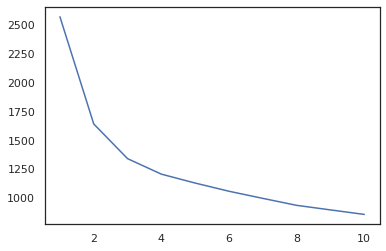

In [386]:
#Finalmente aplico el método K-MEANS
#Se plotea el codo de Jambu también

from sklearn.cluster import KMeans
inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(X_scal)
  inercia.append(k_means.inertia_)
#Visualizar el codo de Jambu

plt.plot(range(1,11),inercia)

In [387]:
## Luego de ello se escoge un valor de K=4 en tomando en cuenta lo visto en clase

k_means2 = KMeans(n_clusters = 4) 
k_means2.fit(X_scal)
labels = k_means2.labels_



In [388]:
labels

array([2, 2, 1, ..., 2, 2, 1], dtype=int32)

In [389]:
np.shape(labels)

(13580,)

In [390]:
#Adicionalmente se puede hacer PCA y graficar
#Imprimo la forma

pca3 = PCA(n_components = 2)
pca3.fit(X_scal)
Xpca = pca3.fit_transform(X_scal)

print(np.shape(Xpca))
print(np.shape(labels))

(13580, 2)
(13580,)


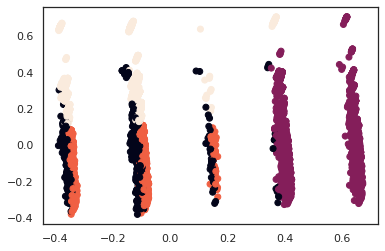

In [391]:
#Finalmente se hace gráfica de dispersión , se muestran las  categorías, lo cual coincide con el preprocesamiento del dataset
plt.scatter(Xpca[:,0],Xpca[:,1],c = labels)
plt.show()

# Pregunta 3: ¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 

In [419]:

#importo las librerías a utilizar
#importo también la dataset que este caso está en formato excel

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline


df3=pd.read_excel('/content/wine.xlsx')
df3

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [399]:
# Obtengo las estadísticas de la data set, con ello también identifico cuales son la columnas que tienen valores numéricos
df3.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [397]:
# obtengo la información del data set, para identificar la cardinaliad de las columnas y notar si la data está balanceada o no
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


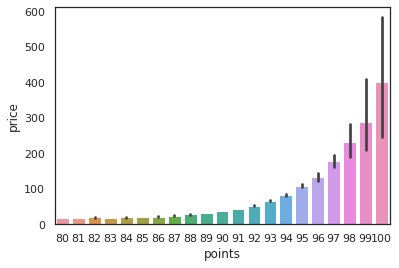

In [401]:
fig=plt = plt.figure('figzie = (10,6')
sns.barplot(x='points',y='price',data=df3)

In [467]:
#extraigo las columnas de interes, voy a clasificar el vino en función de los puntos
df3_new=df3[['price','points']]
df3_new

,price,points
0,235.0,96
1,110.0,96
2,90.0,96
3,65.0,96
4,66.0,95
...,...,...
150925,20.0,91
150926,27.0,91
150927,20.0,91
150928,52.0,90


In [468]:
#separo los vinos en dos tipos : True( Bueno ) , False ( Malo)
df3_new['points']=df3_new['points']>90
df3_new=df3_new.rename(columns={'points':'type'})
df3_new

,price,type
0,235.0,True
1,110.0,True
2,90.0,True
3,65.0,True
4,66.0,True
...,...,...
150925,20.0,True
150926,27.0,True
150927,20.0,True
150928,52.0,False


In [471]:
count_buenos=df3_new['type'].sum()
print('Hay ', count_buenos, 'vinos buenos')

count_malos=150930-count_buenos
print('Hay ', count_malos, 'vinos malos')


Hay  32237 vinos buenos
Hay  118693 vinos malos


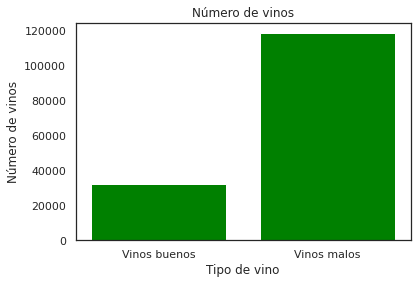

In [474]:
n_vinos=[count_buenos,count_malos]
etiqueta=['Vinos buenos','Vinos malos']

plt.bar(etiqueta,n_vinos,color='green')
plt.title('Número de vinos')
plt.xlabel('Tipo de vino')
plt.ylabel('Número de vinos')
plt.show()


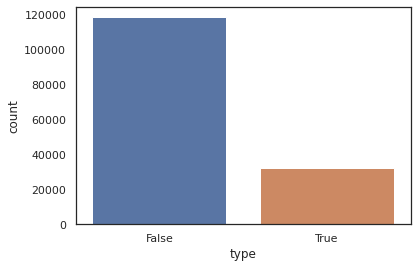

In [475]:
#otra manera de determinar la cantidad de vinos bueno y malos es 
sns.countplot(df3_new['type'])
plt.show()

#Pregunta 4: Puedes graficar un modelo de deep learning para la dataset de breast-cancer

# Pregunta 5: Crea una función que aplane la ruta de una imagen